Применение решающего дерева

In [31]:
from sklearn import cross_validation, tree, metrics
import pandas as pd
import numpy as np
import re 
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('german.data.txt', sep=' ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [17]:
with open('german.doc') as f:
    description = f.readlines()
properties_names = []
properties = {}

description = map(lambda s: s.strip(), description)

for i in xrange(len(description)):
    if re.match('Attr?ibute \d+', description[i]):
        i += 1
        properties_names += [description[i]]
    match = re.match('(A\d+) : (.*)', description[i])
    if match:
        properties[match.group(1)] = match.group(2)
properties_names += ['Give credit']

In [18]:
data.columns = properties_names
data.replace(properties, inplace=True)
print 'число признаков =', len(data.columns) - 1
data.head()

число признаков = 20


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Give credit
0,... < 0 DM,6,critical account/,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreement/,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [19]:
data_encode = pd.get_dummies(data)
print 'Теперь число признаков =', len(data_encode.columns) - 1
data_encode.head()

Теперь число признаков = 61


,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Give credit,Status of existing checking account_ ... < 0 DM,Status of existing checking account_ ... >= 200 DM /,...,Housing_own,Housing_rent,Job_management/ self-employed/,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under the customers name",foreign worker_no,foreign worker_yes
0,6,1169,4,4,67,2,1,1,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,48,5951,2,2,22,1,1,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,12,2096,2,3,49,1,2,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,42,7882,2,4,45,1,2,1,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24,4870,3,4,53,2,2,2,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
data_encode[u'Give credit'] = data_encode[u'Give credit'].apply(lambda x: 0 if x == 2 else 1)
y = data_encode[u'Give credit']
X = data_encode.drop((u'Give credit'), axis=1)

In [21]:
print 'Доли классов'
print '{} объектов 1-го класса'.format((y==1).sum() * 1./len(y))
print '{} объектов 0-го класса'.format((y==0).sum() * 1./len(y))

Доли классов
0.7 объектов 1-го класса
0.3 объектов 0-го класса


In [23]:
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(X, y)
dot_data = tree.export_graphviz(classifier, out_file="tree3.out", 
                         feature_names=X.columns,  
                         class_names=['credit', 'no credit'],  
                         filled=True, rounded=True,  
                         special_characters=False)  


In [24]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X, y)
dot_data = tree.export_graphviz(classifier, out_file="tree.out", 
                         feature_names=X.columns,  
                         class_names=['credit', 'no credit'],  
                         filled=True, rounded=True,  
                         special_characters=False)  


In [27]:
depths = np.arange(1, 30)
scores = []
train_score = []
X_train, y_train, X_test, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    scores += [cross_validation.cross_val_score(model, X, y, scoring='roc_auc').mean()]
    model.fit(X, y)
    train_score += [metrics.roc_auc_score(y, model.predict(X))]

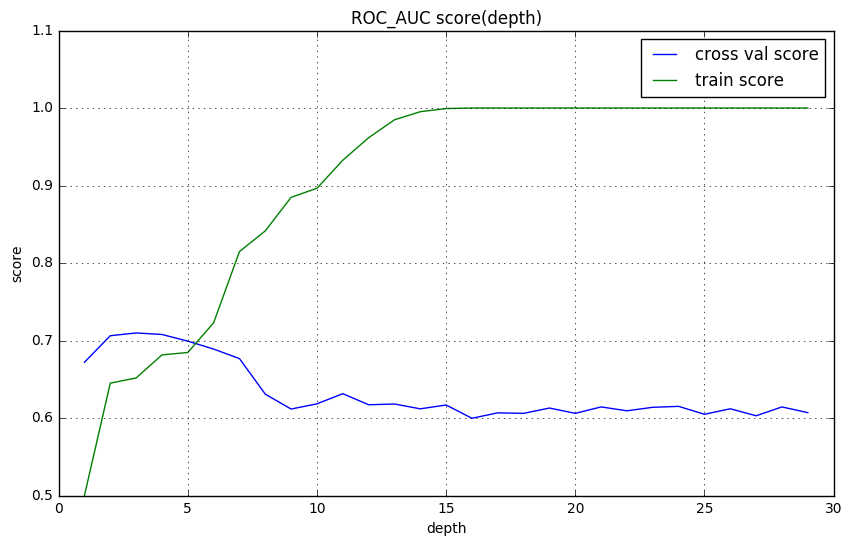

In [28]:
plt.figure(figsize=(10, 6))
plt.title('ROC_AUC score(depth)')
plt.plot(depths, scores, label='cross val score')
plt.plot(depths, train_score, label='train score')
plt.grid(True)
plt.xlabel('depth')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

In [29]:
print 'best depth =', np.argmax(scores) + 1

best depth = 3
